# Importing Libraries

In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For outlier detection
from scipy import stats

# For time series forecasting
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# For machine learning models
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Analysis

### 1. Load and Preview the Data

In [11]:
# Load Dataset
sales = pd.read_csv(r'amazon_sales_dataset.csv')

# Preview random five rows from dataset
sales.sample(5)

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
30423,23-04-2019,42,52,57.41,C,39690,66.42,3.050,126.471333,9.524,0,2019,4,16,112.42,-1.84,33.125734,30.94,16.166097,0.00
333533,20-07-2021,22,83,1665.02,B,119557,76.57,3.610,142.233757,7.753,0,2021,7,29,2925.33,747.04,1535.118182,1487.39,374.802578,8154.10
117342,10-12-2019,40,56,1948.64,A,155083,21.64,3.132,132.676400,5.287,0,2019,12,49,20643.67,192.60,3787.050769,2129.50,4283.347438,0.00
3056,12-02-2019,13,59,1330.19,A,219622,33.16,2.671,126.496258,8.316,1,2019,2,6,20704.07,214.74,1327.836364,703.13,2579.661651,0.00
360191,28-09-2021,40,59,79.87,A,155083,50.98,4.018,138.739500,4.156,0,2021,9,39,2150.95,-0.65,274.052448,202.71,268.995597,8995.13


In [15]:
# Data shape
print(f'Total Number of Rows: {sales.shape[0]} \nTotal Number of Columns: {sales.shape[1]}')

Total Number of Rows: 374247 
Total Number of Columns: 20


### 2. Data Structure and Summary Information

In [20]:
# Check data types and non-null counts for each column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374247 entries, 0 to 374246
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            374247 non-null  object 
 1   Store           374247 non-null  int64  
 2   Dept            374247 non-null  int64  
 3   Weekly_Sales    374247 non-null  float64
 4   Type            374247 non-null  object 
 5   Size            374247 non-null  int64  
 6   Temperature     374247 non-null  float64
 7   Fuel_Price      374247 non-null  float64
 8   CPI             374247 non-null  float64
 9   Unemployment    374247 non-null  float64
 10  IsHoliday       374247 non-null  int64  
 11  Year            374247 non-null  int64  
 12  Month           374247 non-null  int64  
 13  Week            374247 non-null  int64  
 14  max             374247 non-null  float64
 15  min             374247 non-null  float64
 16  mean            374247 non-null  float64
 17  median    

In [19]:
# Get descriptive statistics of numerical columns
sales.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
count,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000,374247.000000
mean,22.299345,43.421369,13058.690149,134650.701571,60.241022,3.354381,173.423324,7.695551,0.061211,2019.968702,6.437807,25.788471,30520.909403,8428.549075,13346.242316,12562.757282,3592.673175,4791.216015
std,12.919329,30.087812,15417.195280,60805.893266,18.112858,0.466553,38.918398,1.390530,0.239717,0.802722,3.180864,13.840661,42046.263020,11364.174300,15474.285934,15032.726407,5243.661887,8782.811084
min,1.000000,1.000000,0.000000,34875.000000,14.020000,2.472000,126.064000,3.879000,0.000000,2019.000000,1.000000,1.000000,0.020000,-4988.940000,-116.454545,-143.000000,0.000000,0.000000
25%,11.000000,18.000000,1979.800000,93188.000000,47.130000,2.891000,132.756800,6.858000,0.000000,2019.000000,4.000000,14.000000,5794.330000,675.000000,2308.411818,2017.000000,731.571412,0.000000
50%,22.000000,36.000000,7101.310000,128107.000000,62.490000,3.462000,188.797935,7.838000,0.000000,2020.000000,6.000000,26.000000,17294.460000,3847.950000,7534.953916,6856.100000,1880.958217,0.000000
75%,33.000000,72.000000,18252.355000,202307.000000,74.220000,3.738000,213.178695,8.512000,0.000000,2021.000000,9.000000,37.000000,41082.450000,11424.500000,18687.708250,17317.790000,4263.309723,6893.330000
max,45.000000,99.000000,72756.180000,219622.000000,100.140000,4.468000,227.232807,12.187000,1.000000,2021.000000,12.000000,52.000000,649770.180000,72028.740000,108598.364100,107690.800000,71265.927070,43413.900000


### 3. Check for missing values and removing duplicates

In [25]:
# Check for missing values
sales.isnull().sum()

Date              0
Store             0
Dept              0
Weekly_Sales      0
Type              0
Size              0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
IsHoliday         0
Year              0
Month             0
Week              0
max               0
min               0
mean              0
median            0
std               0
Total_MarkDown    0
dtype: int64

In [29]:
# Removing Duplicates
print("Number of duplicate rows:", sales.duplicated().sum())
sales.drop_duplicates(inplace = True)
print("Number of rows after removing duplicates:", sales.shape[0])

Number of duplicate rows: 0
Number of rows after removing duplicates: 374247


In [99]:
# Removing unnecesary variables 
sales = sales[['Date', 'Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]

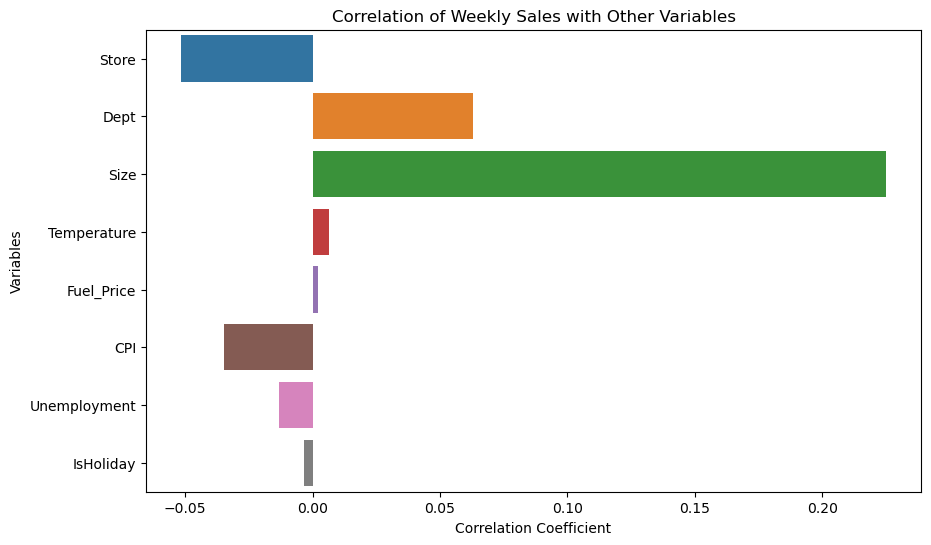

In [100]:
# Correlation of Weekly_Sales with all other numerical variables
weekly_sales_corr = sales.corrwith(sales['Weekly_Sales'])

# Drop the correlation of Weekly_Sales with itself (which is 1)
weekly_sales_corr = weekly_sales_corr.drop('Weekly_Sales')

# Create a horizontal bar plot for the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales_corr.values, y=weekly_sales_corr.index, orient='h')
plt.title('Correlation of Weekly Sales with Other Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()


   Store  Weekly_Sales
0      6  1.740065e+08
1      4  1.716646e+08
2     23  1.712969e+08
3     10  1.688137e+08
4      2  1.618848e+08


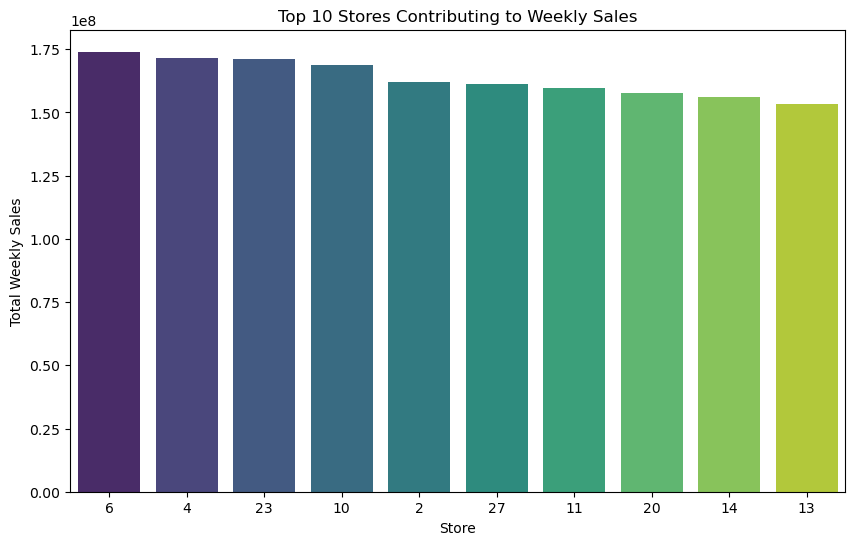

In [75]:
# Group by 'Store' and sum the 'Weekly_Sales'
store_sales = sales.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the stores by the total sales in descending order
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False, ignore_index= True)

# Display the top 5 stores contributing to weekly sales
print(top_stores.head())

# Extract top 10 stores
top_10_stores = top_stores.head(10)

# Plot the top 10 stores contributing to weekly sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_10_stores, palette='viridis', order=top_10_stores['Store'])
plt.title('Top 10 Stores Contributing to Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()


   Dept  Weekly_Sales
0    40  2.038985e+08
1    38  1.974426e+08
2     2  1.831550e+08
3    13  1.769688e+08
4    72  1.694193e+08


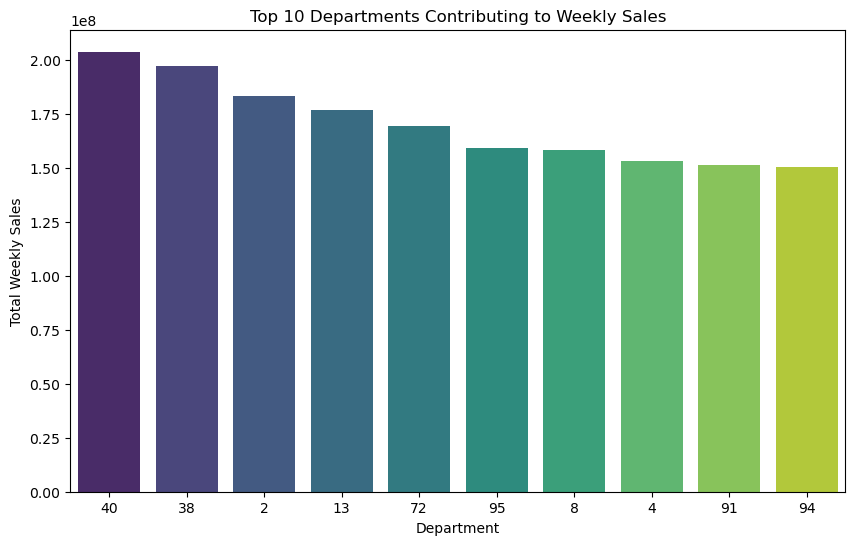

In [78]:
# Group by 'Dept' and sum the 'Weekly_Sales'
dept_sales = sales.groupby('Dept')['Weekly_Sales'].sum().reset_index()

# Sort the departments by the total sales in descending order
top_depts = dept_sales.sort_values(by='Weekly_Sales', ascending=False, ignore_index=True)

# Display the top 5 departments contributing to weekly sales
print(top_depts.head())

# Extract top 10 departments
top_10_depts = top_depts.head(10)

# Plot the top 10 departments contributing to weekly sales in order
plt.figure(figsize=(10, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=top_10_depts, palette='viridis', order=top_10_depts['Dept'])
plt.title('Top 10 Departments Contributing to Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.show()


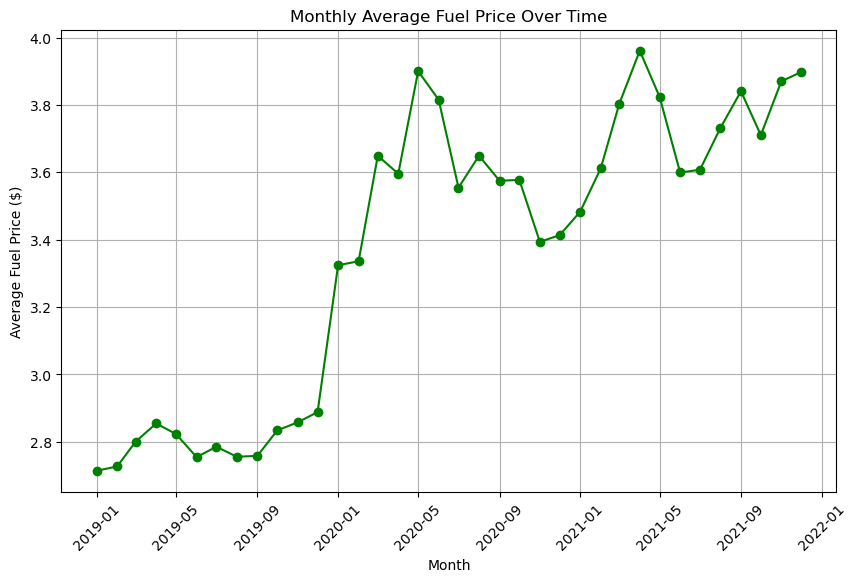

In [81]:
# Ensure 'Date' is in datetime format
sales['Date'] = pd.to_datetime(sales['Date'])

# Create a new column for Year-Month to aggregate by month
sales['YearMonth'] = sales['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate the average 'Fuel_Price' for each month
monthly_fuel_price = sales.groupby('YearMonth')['Fuel_Price'].mean().reset_index()

# Convert 'YearMonth' back to a datetime for proper plotting
monthly_fuel_price['YearMonth'] = monthly_fuel_price['YearMonth'].dt.to_timestamp()

# Plot the line chart for monthly average fuel price
plt.figure(figsize=(10, 6))
plt.plot(monthly_fuel_price['YearMonth'], monthly_fuel_price['Fuel_Price'], color='green', marker='o')
plt.title('Monthly Average Fuel Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Fuel Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

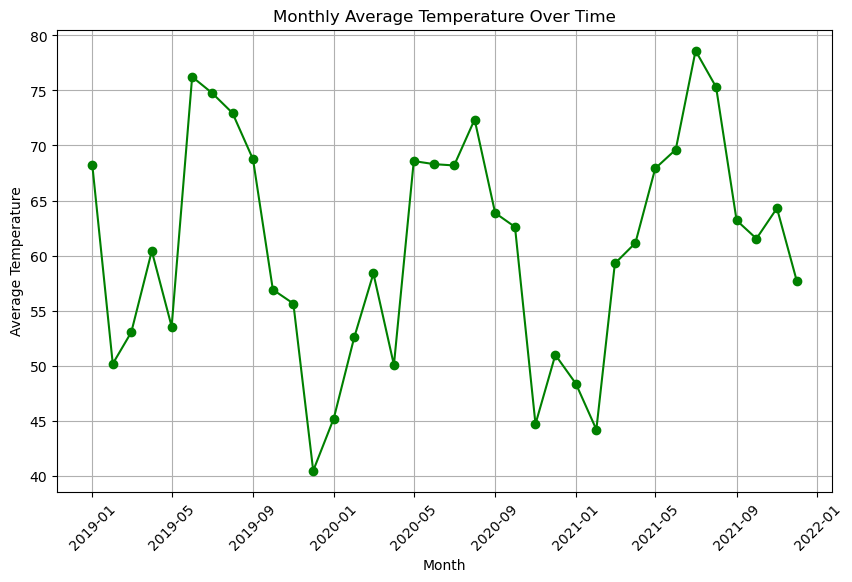

In [85]:
# Ensure 'Date' is in datetime format
sales['Date'] = pd.to_datetime(sales['Date'])

# Create a new column for Year-Month to aggregate by month
sales['YearMonth'] = sales['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate the average 'Temperature' for each month
monthly_temperature = sales.groupby('YearMonth')['Temperature'].mean().reset_index()

# Convert 'YearMonth' back to a datetime for proper plotting
monthly_temperature['YearMonth'] = monthly_temperature['YearMonth'].dt.to_timestamp()

# Plot the line chart for monthly average fuel price
plt.figure(figsize=(10, 6))
plt.plot(monthly_temperature['YearMonth'], monthly_temperature['Temperature'], color='green', marker='o')
plt.title('Monthly Average Temperature Over Time')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

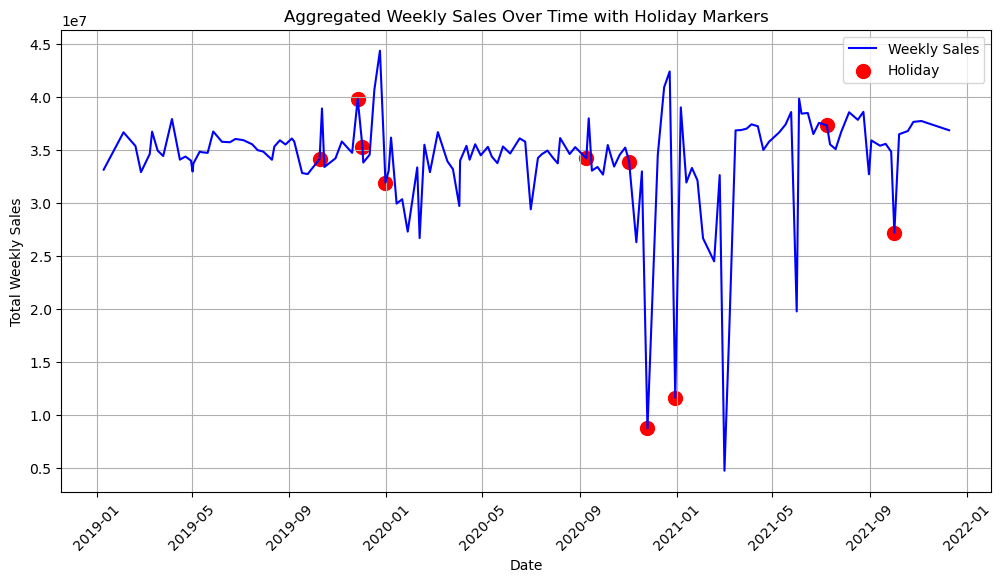

In [89]:
# Aggregate weekly sales by 'Date' to sum across all stores/departments
weekly_sales_aggregated = sales.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot the line chart for aggregated Weekly Sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales_aggregated['Date'], weekly_sales_aggregated['Weekly_Sales'], color='blue', label='Weekly Sales')

# Overlay markers where IsHoliday is 1 (holiday weeks) after aggregation
holiday_sales = sales[sales['IsHoliday'] == 1].groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.scatter(holiday_sales['Date'], holiday_sales['Weekly_Sales'], color='red', label='Holiday', marker='o', s=100)

# Add labels and title
plt.title('Aggregated Weekly Sales Over Time with Holiday Markers')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()


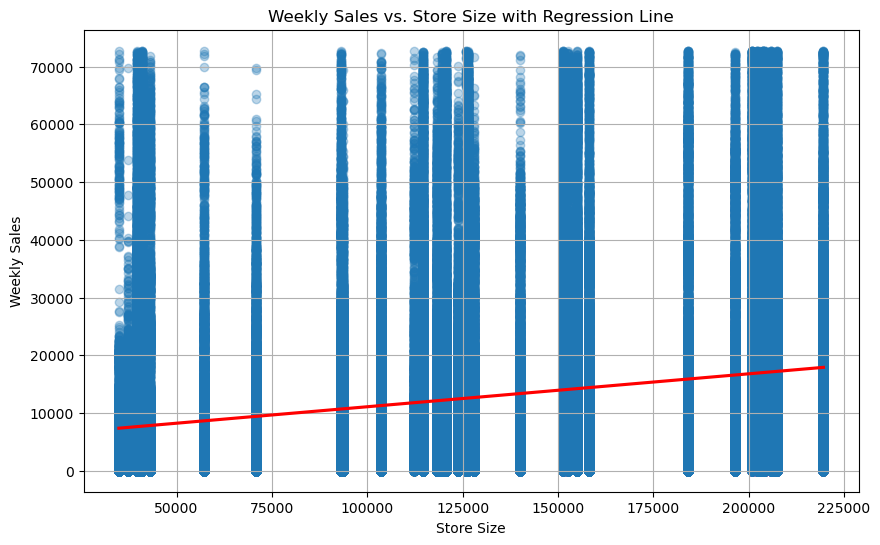

In [102]:
# Scatter plot with regression line for Weekly Sales vs Store Size
plt.figure(figsize=(10, 6))
sns.regplot(x='Size', y='Weekly_Sales', data=sales, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

# Add title and labels
plt.title('Weekly Sales vs. Store Size with Regression Line')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')

# Show the plot
plt.grid(True)
plt.show()